<a href="https://colab.research.google.com/github/Oluseysco/Forensic_Centre_DataScientist_Assignment/blob/main/Centre_of_Forensic_DataScientist_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import cv2
import numpy as np

def load_image(path):
    return cv2.imread(path)

def preprocess_image(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # return blurred
    return gray

def detect_breech_face(image):
    # This is a placeholder; actual detection depends on image characteristics
    # Here, we're assuming the breech-face impression is a circular area at the center
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    radius = min(center) // 2
    mask = np.zeros_like(image)
    cv2.circle(mask, center, radius, (0, 0, 255), -1)  # Red mask
    return mask

def detect_firing_pin_impression(image):
    # Placeholder detection; adjust as needed
    # Assuming firing pin impression is smaller and offset from the center
    height, width = image.shape[:2]
    offset_center = (width // 3, height // 3)
    radius = min(offset_center) // 4
    mask = np.zeros_like(image)
    cv2.circle(mask, offset_center, radius, (255, 0, 0), -1)  # Blue mask
    return mask

def combine_masks(image, *masks):
    for mask in masks:
        image = cv2.addWeighted(image, 1, mask, 0.5, 0)
    return image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab.patches import cv2_imshow

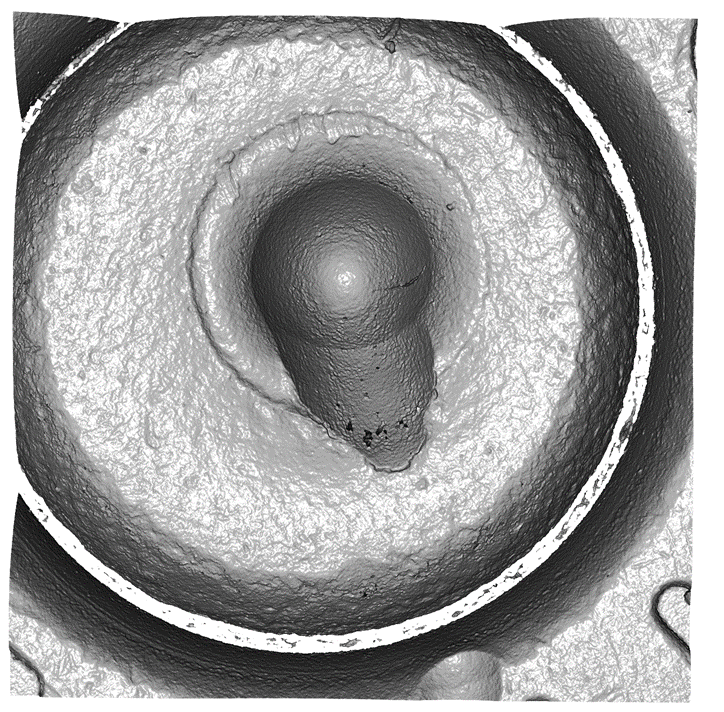

In [ ]:
img = cv2.imread('bullet.png')
cv2_imshow(img)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(712, 724, 3)

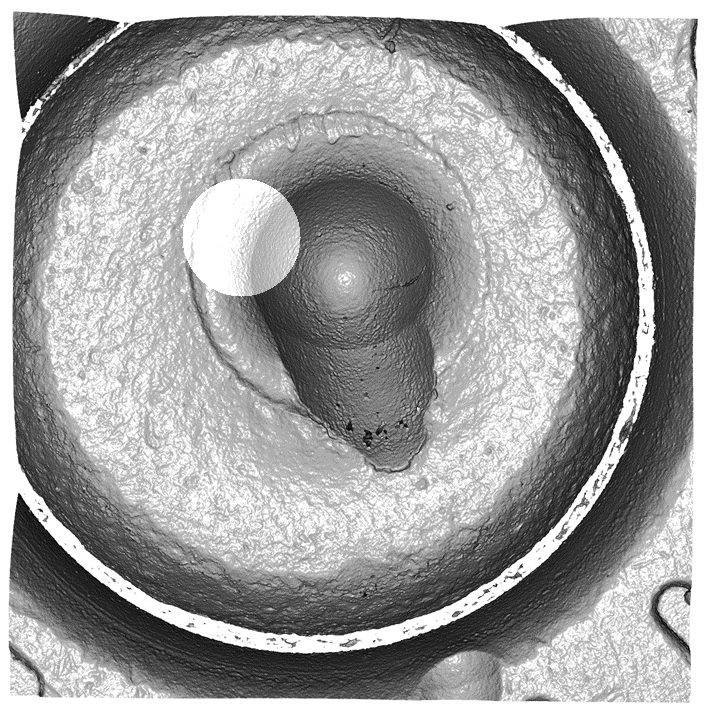

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

height, width = blurred.shape[:2]
center = (width // 2, height // 2)
radius = min(center) // 2
mask = np.zeros_like(blurred)
breech_face_mask = cv2.circle(mask, center, radius, (0, 0, 255), -1)  # Red mask

height, width = blurred.shape[:2]
offset_center = (width // 3, height // 3)
radius = min(offset_center) // 4
mask = np.zeros_like(blurred)
firing_pin_mask = cv2.circle(mask, offset_center, radius, (255, 0, 0), -10)  # Blue mask

# for mask in [breech_face_mask, firing_pin_mask]:
final_image = cv2.addWeighted(gray, 1, firing_pin_mask, 0.5, 0)

cv2_imshow(final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
img.shape[0] / 2

356.0

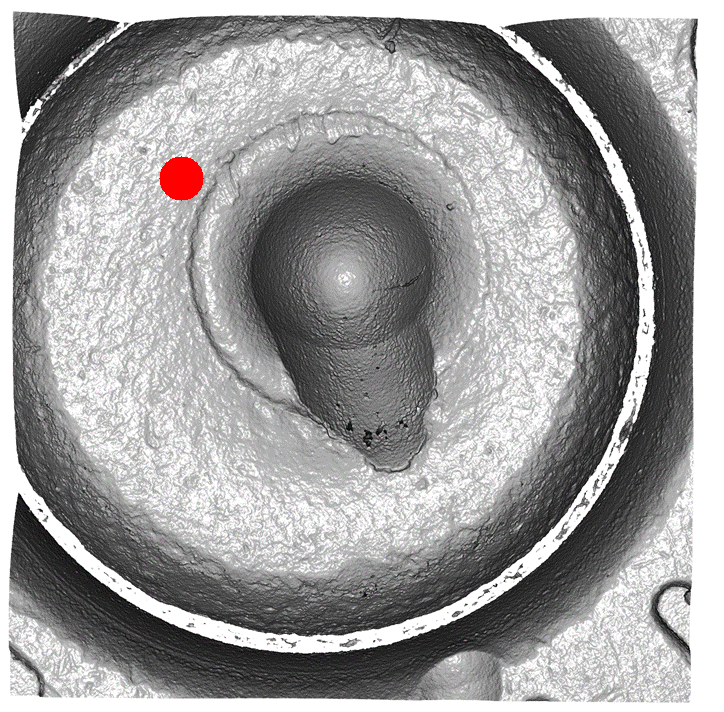

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('bullet.png')

# Center coordinates
# center_coordinates = (712, 724)

# # Radius of circle
# radius = int(img.shape[0] / 2)

# Red color in BGR
color = (0, 0, 255)

# Line thickness of -1 px
thickness = -2

height, width = img.shape[:2]
offset_center = (width // 2, height // 2)
radius = max(offset_center) // 4
# mask = np.zeros_like(blurred)

image = cv2.circle(img, offset_center, radius, color, thickness)

cv2_imshow(image)

# Using cv2.circle() method
# Draw a circle of red color of thickness -1 px
# image = cv2.circle(img, center_coordinates, radius, color, thickness)

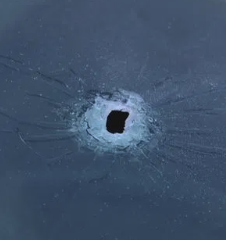

In [ ]:
image_path = 'xxsx.png'
original_image = cv2.imread(image_path)
cv2_imshow(original_image)

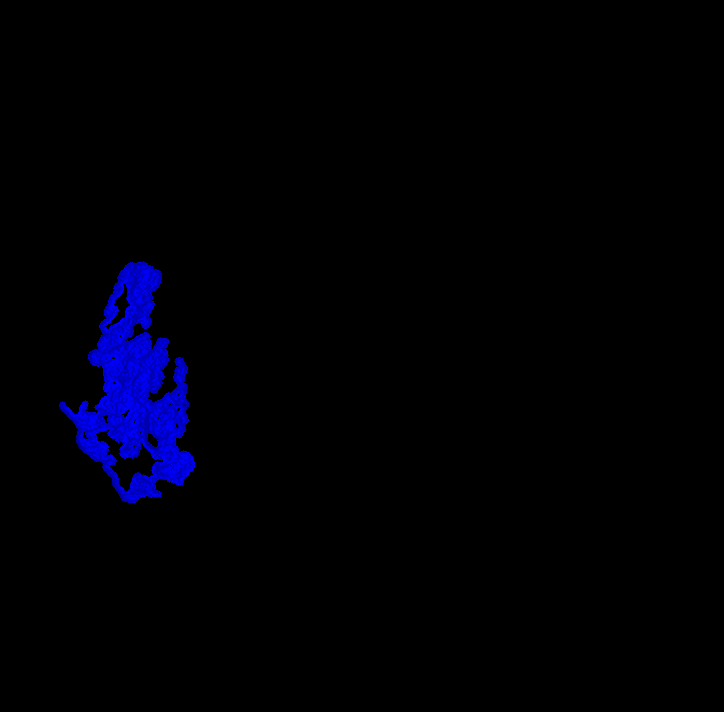

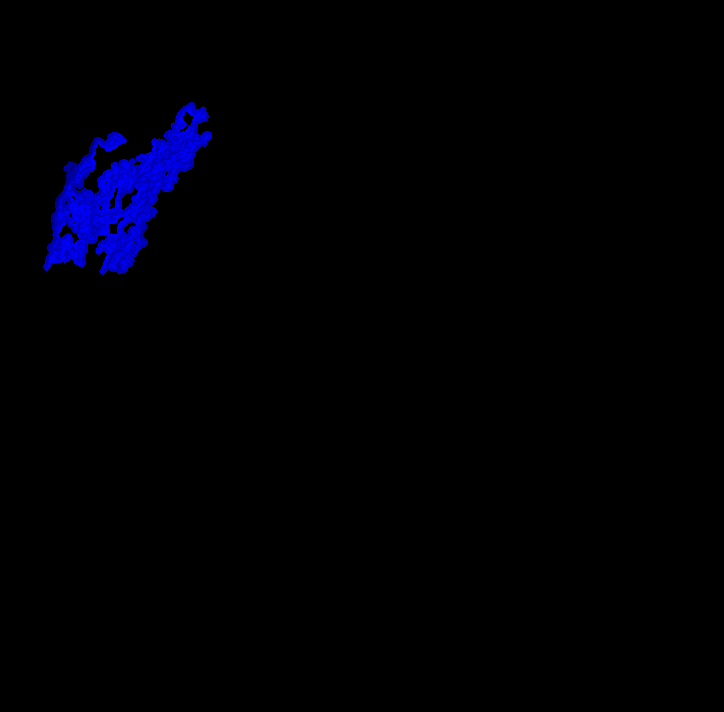

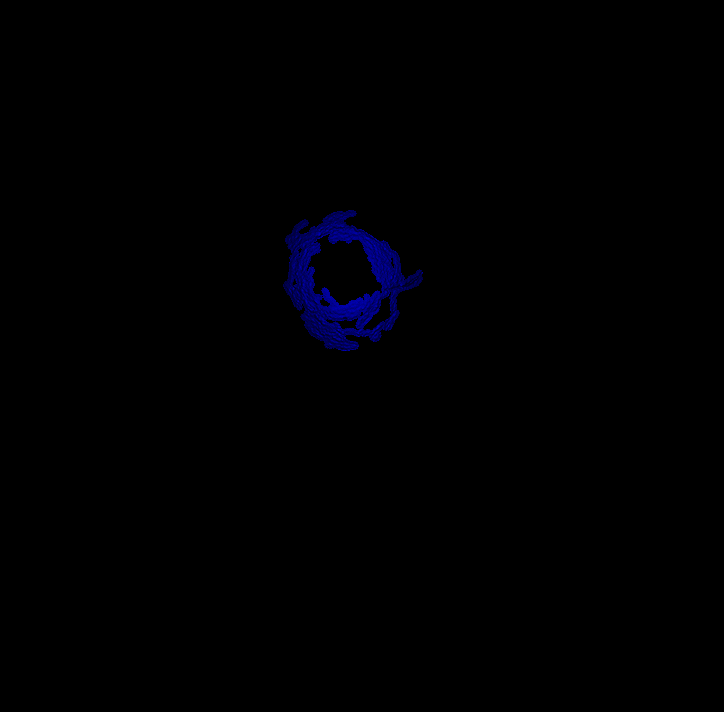

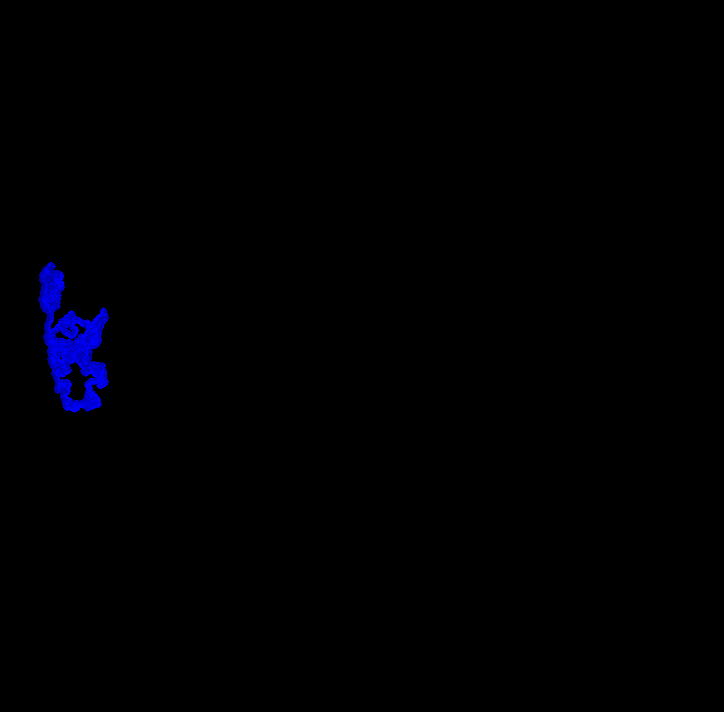

In [ ]:
# Load the image
image_path = 'bullet.png'
original_image = cv2.imread(image_path)
# cv2_imshow(original_image)

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# gray_image = cv2.GaussianBlur(gray, (5, 5), 0)

# Use the Canny edge detector to find edges in the image
edges = feature.canny(gray_image, sigma=1)

# Find the contours from the edged image
contours, _ = cv2.findContours((edges * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Red color in BGR
color = (0, 0, 255)

# Line thickness of -1 px
thickness = -2

for cnt in sorted_contours[:4]:
    mask = np.zeros_like(original_image)
    cv2.drawContours(mask, [cnt], -1, (255, 0, 0), 5)
    masked_image = cv2.bitwise_and(original_image, mask)



#     # Get the bounding rectangle of the contour
#     # x, y, w, h = cv2.boundingRect(cnt)

#     # # Print the height and width of the contour
#     # # print("Height:", h)
#     # # print("Width:", w)

#     # # height, width = img.shape[:2]
#     # offset_center = (x, y)
#     # radius = max(offset_center) // 8
#     # # mask = np.zeros_like(gray_image)

#     # image = cv2.circle(original_image, offset_center, radius, color, thickness)

    cv2_imshow(masked_image)

# # Sort the contours by area and get the largest two which should correspond to the inner and outer circular holes
# sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]

# # Create masks for inner and outer circular holes
# mask_inner = np.zeros_like(gray_image)
# mask_outer = np.zeros_like(gray_image)




# image = cv2.circle(img, center_coordinates, radius, color, thickness)




# mask = np.zeros_like(original_image)
# # Assuming the first contour is the outer and the second is the inner
# cv2.drawContours(mask, [sorted_contours[0]], -1, (255, 0, 0), thickness=50)
# cv2.drawContours(mask, [sorted_contours[2]], -1, (0, 0, 255), thickness=50)

# masked_image = cv2.bitwise_and(original_image, mask)

# cv2_imshow(masked_image)

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('bullet.png')

height, width = image.shape[:2]
offset_center = (width // 4, height // 4)
radius = max(offset_center) // 8

# # Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# # Apply Gaussian blur
# gray_blurred = cv2.GaussianBlur(gray, (9, 9), 2, 2)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(gray,
                           cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30,
                           minRadius=radius)
print(len(circles))
# # Ensure at least some circles were found
# if circles is not None:
#     # Convert the (x, y) coordinates and radius of the circles to integers
#     circles = np.round(circles[0, :]).astype("int")

#     # Loop over the (x, y) coordinates and radius of the circles
#     for (x, y, r) in circles:
#         # Choose color for masking
#         color = (0, 0, 255) # Red
#         # Draw the circle in the output image
#         cv2.circle(image, (x, y), r, color, -1)  # -1 thickness fills the circle

# cv2_imshow(image)
# Save the output image
# cv2.imwrite('output.jpg', image)


1


In [ ]:
circles

array([[[336.5, 311.5, 293.2],
        [353.5, 347.5, 268.5],
        [305.5, 309.5, 283.2],
        ...,
        [685.5, 396.5,  27.1],
        [681.5,   5.5,  44.4],
        [673.5, 705.5,  30.2]]], dtype=float32)

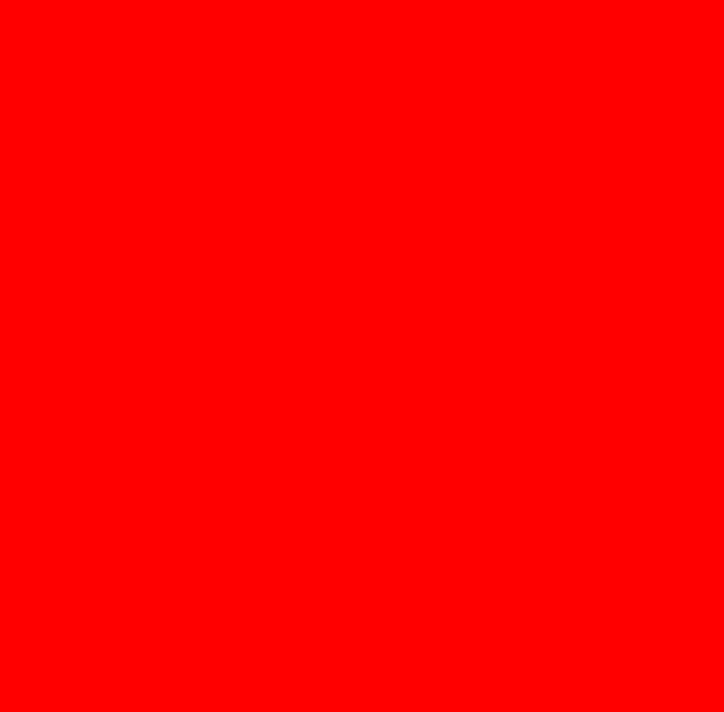

In [ ]:
zzfrom google.colab.patches import cv2_imshow

# Ensure at least some circles were found
# if circles is not None:
#     # Convert the (x, y) coordinates and radius of the circles to integers
#     circles = np.round(circles[0, :]).astype("int")
# circles
    # Loop over the (x, y) coordinates and radius of the circles
x, y, r = list(circles)
# Choose color for masking
color = (0, 0, 255) # Red
# Draw the circle in the output image
cv2.circle(image, (x, y), r, color, -1)  # -1 thickness fills the circle


cv2_imshow(image)

In [ ]:
list(circles)

[336, 312, 293]

In [ ]:
x, y, r = list(circles)
print(x)

336


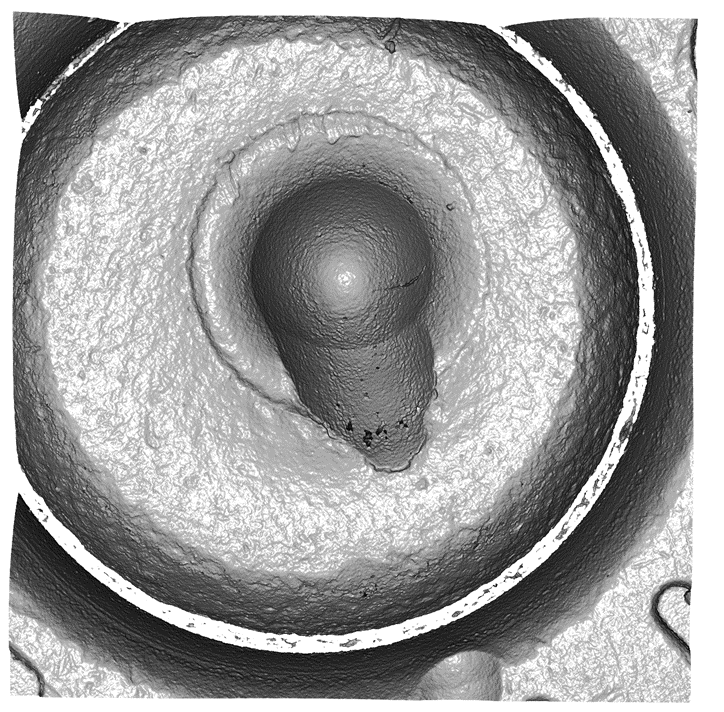

In [ ]:
cv2_imshow(gray)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, color, io

# Load the image
image_path = 'xxsx.png'
original_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Use the Canny edge detector to find edges in the image
edges = feature.canny(gray_image, sigma=3)

# Find the contours from the edged image
contours, _ = cv2.findContours((edges * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area and get the largest two which should correspond to the inner and outer circular holes
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]

# Create masks for inner and outer circular holes
mask_inner = np.zeros_like(gray_image)
mask_outer = np.zeros_like(gray_image)

# Assuming the first contour is the outer and the second is the inner
cv2.drawContours(mask_outer, [sorted_contours[0]], -1, (255), thickness=cv2.FILLED)
cv2.drawContours(mask_inner, [sorted_contours[1]], -1, (255), thickness=cv2.FILLED)

# Create a colored image to overlay the masks
colored_mask = np.zeros_like(original_image)

# # Fill the masks with the specified colors
# colored_mask[mask_inner == 255] = [255, 0, 0]  # Red color for inner hole
# colored_mask[mask_outer == 255] = [0, 0, 255]  # Blue color for outer impact

# # Combine the original image with the colored mask
# output_image = cv2.addWeighted(original_image, 1, colored_mask, 0.5, 0)

# # Convert the output image to RGB for displaying with matplotlib
# output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# # Display the result
# plt.figure(figsize=(10, 10))
# plt.imshow(output_image_rgb)
# plt.axis('off')
# plt.show()


In [ ]:
sorted_contours[1].shape

(62, 1, 2)

In [ ]:
channels = (3,)
inner = np.zeros((colored_mask[mask_inner == 255].shape + channels), dtype=np.uint8)
# Set all channels to red (255)
inner[:, :, 0] = 255

colored_mask[mask_inner == 255] = inner[:, :, 0]

In [ ]:
channels = (3,)
outer = np.zeros((colored_mask[mask_outer == 255].shape + channels), dtype=np.uint8)
# Set all channels to red (255)
outer[:, :, 2] = 255

colored_mask[mask_outer == 255] = outer[:, :, 2]

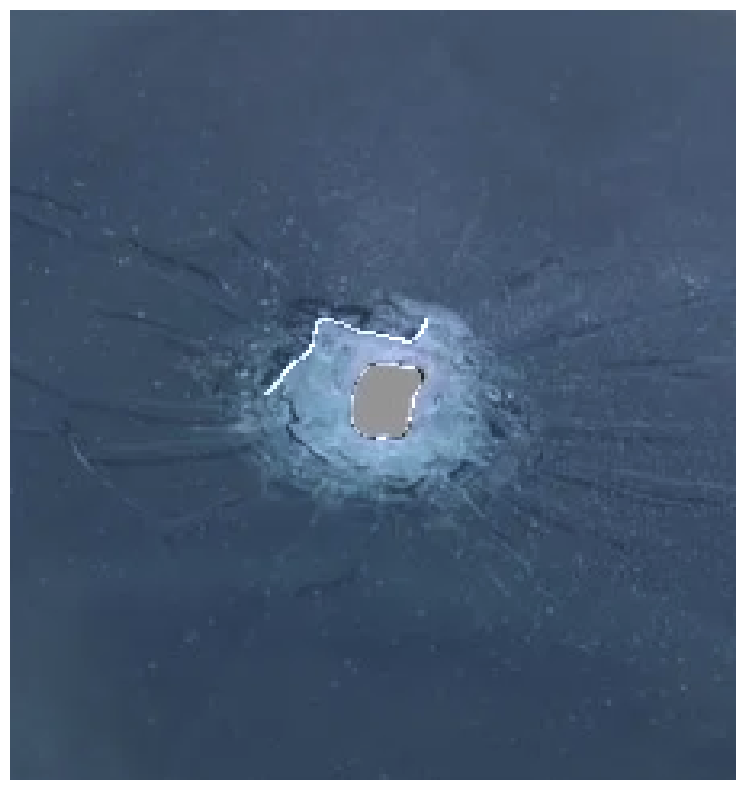

In [ ]:
# Combine the original image with the colored mask
output_image = cv2.addWeighted(original_image, 1, colored_mask, 0.5, 0)

# Convert the output image to RGB for displaying with matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(output_image_rgb)
plt.axis('off')
plt.show()


In [ ]:
mask_inner.shape

(240, 226)

In [ ]:
mask_outer.shape

(240, 226)

In [ ]:
import numpy as np

# Define the image array with 3 channels for RGB color
image = np.zeros((82, 4, 3), dtype=np.uint8)

# Set all channels to red (255)
image[:, :, 0] = 255

# Print the image shape and first few rows to confirm
print(f"Image shape: {image.shape}")
print(image[:5, :, :])


Image shape: (82, 4, 3)
[[[255   0   0]
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  [255   0   0]]]
